## Data Collection

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import uuid
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\Vstore Computer\Datasets\flight_price_data.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# Checking the data
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Add unique ID
df['id'] = [uuid.uuid4() for _ in range(len(df))]

In [5]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,id
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5e889d77-39f4-4c55-87f1-e6809256972b
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,5f9c50db-8c77-4040-a45b-5661a7602f3d
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,eac77a21-8cb1-4750-9a65-db920d74b4de
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,d2f00ce0-2d54-4812-89b6-c9f3647ae4fb
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,e65cdf75-2cf5-427c-92a7-b312ec7a1bc6


In [6]:
df.sample(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,id
3357,Vistara,Delhi,Evening,one,Afternoon,Mumbai,Economy,20.08,18,16050,020a7330-0211-4364-83ac-9ea497e01771
93047,Vistara,Bangalore,Morning,one,Night,Delhi,Economy,12.42,45,4111,dabb2087-2411-4dcb-ae27-5ab2fb354371
254595,Vistara,Bangalore,Morning,one,Evening,Kolkata,Business,8.08,28,82113,b11aebe7-fc51-48e4-a656-b24f99d2f448
75273,Vistara,Mumbai,Night,one,Morning,Hyderabad,Economy,12.08,36,3334,df274f0f-6ad1-4797-a0b3-bfaacecf7eb5
117308,GO_FIRST,Bangalore,Morning,one,Night,Chennai,Economy,14.17,23,4687,df2bb667-9672-4ea9-b1ea-44a537c8b8fd


In [7]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price', 'id'],
      dtype='object')

In [8]:
new_order_column = ['id', 'airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
df = df[new_order_column]

In [9]:
df.columns

Index(['id', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                300153 non-null  object 
 1   airline           300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df.isna().sum()

id                  0
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [14]:
df.shape

(300153, 11)

In [15]:
for col in df.columns:
  count_values = df[col].value_counts()
  print(f'Column called \033[91m{col}\033[0m has \033[94m{len(count_values)}\033[0m unique values')

Column called id has 300153 unique values
Column called airline has 6 unique values
Column called source_city has 6 unique values
Column called departure_time has 6 unique values
Column called stops has 3 unique values
Column called arrival_time has 6 unique values
Column called destination_city has 6 unique values
Column called class has 2 unique values
Column called duration has 476 unique values
Column called days_left has 49 unique values
Column called price has 12157 unique values


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

class
Economy     206666
Business     93487
Name: count, dtype: int64



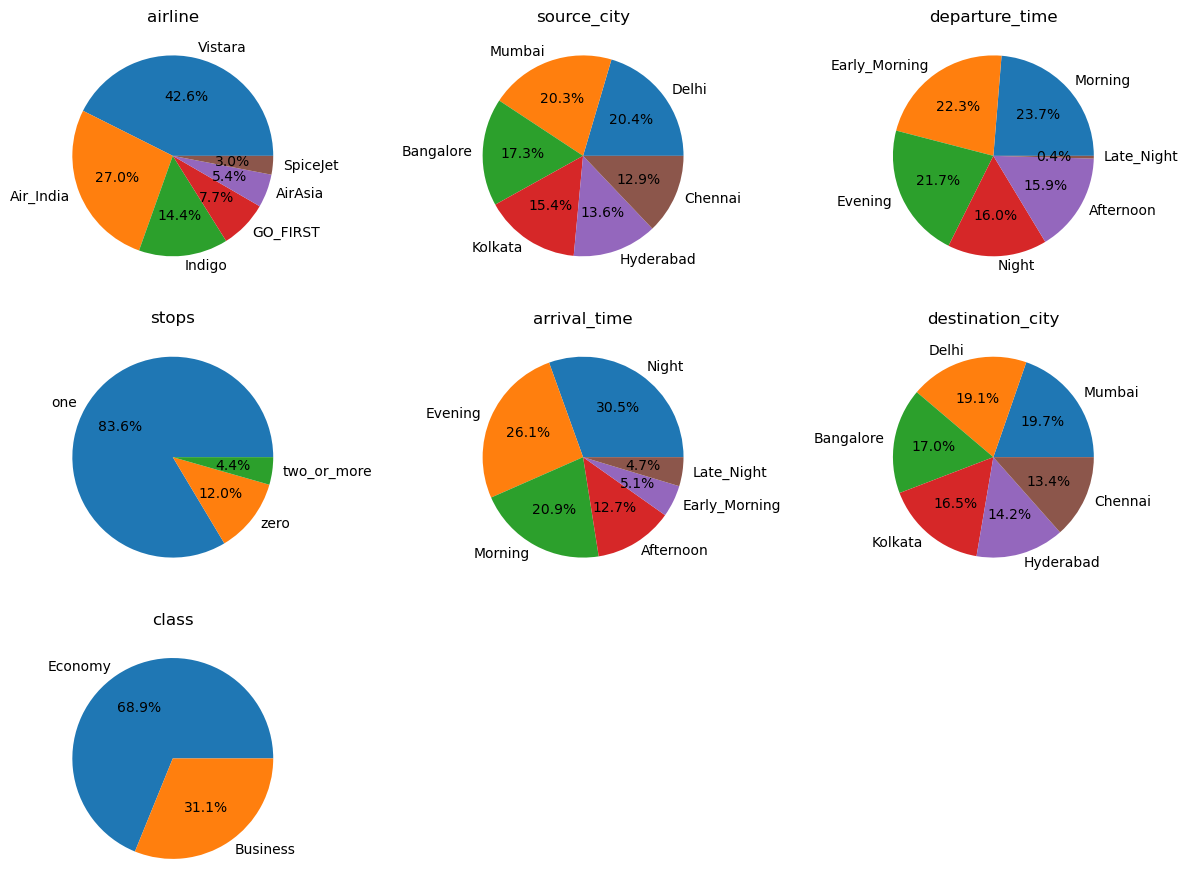

In [16]:
# Make pie chart of airline, source_city, departure_time, stops, arrival_time, destination_city and class columns
columns = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
plt.figure(figsize=(15,15))
for col in columns:
  count_values = df[col].value_counts()
  print(count_values,end='\n\n')
  plt.subplot(4,3,columns.index(col)+1)
  plt.title(col)    
  plt.pie(count_values,labels=count_values.index,autopct='%1.1f%%')
  plt.axis('off')
plt.show()

In [17]:
# Find minimum, maximum and the average duration of all flights
print(f'Maximum flight duration {df["duration"].max()}', 'hours whether it has flight stops or not')
print(f'Minimum flight duration {df["duration"].min()}', 'hours whether it has flight stops or not')
print(f'Average flights duration {df["duration"].median()}', 'hours whether it has flight stops or not')

Maximum flight duration 49.83 hours whether it has flight stops or not
Minimum flight duration 0.83 hours whether it has flight stops or not
Average flights duration 11.25 hours whether it has flight stops or not


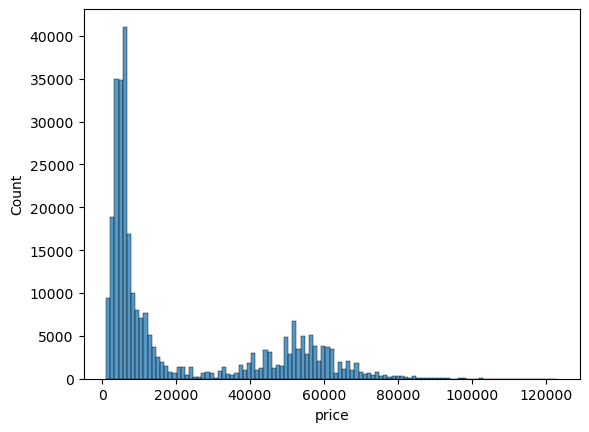

In [18]:
sns.histplot(df['price']);

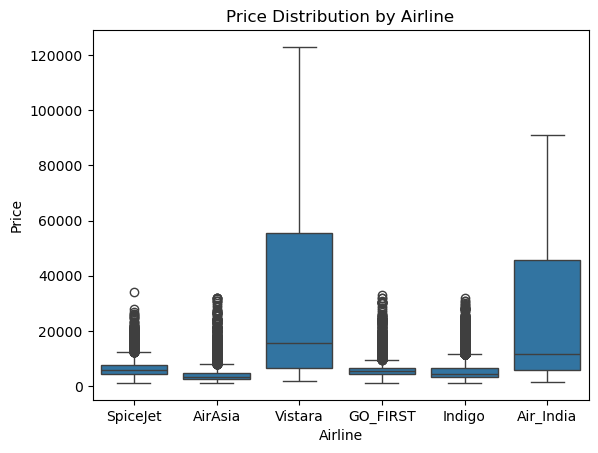

In [19]:
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')


plt.show()

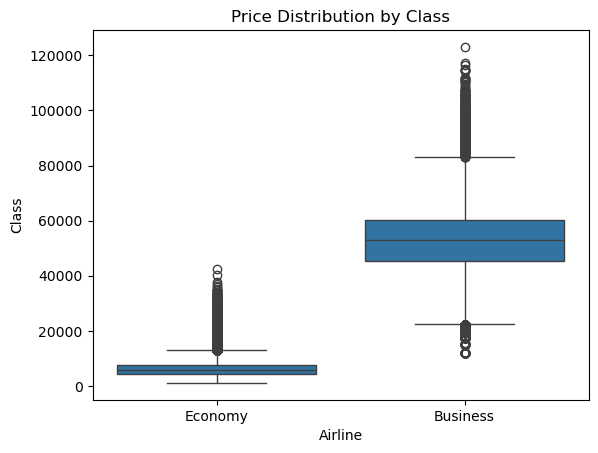

In [20]:
sns.boxplot(x='class', y='price', data=df)
plt.title('Price Distribution by Class')
plt.xlabel('Airline')
plt.ylabel('Class')


plt.show()

## Data Cleansing & Preprocessing

In [21]:
# IQR
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["price"] < fence_low) | (df["price"] > fence_high)]

print(f"Outliers: {df["price"]}")

Outliers: 0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64


In [22]:
# Handle outliers
# Using IQR
df_clean = df.loc[(df["price"] >= fence_low) & (df["price"] <= fence_high)]

df_clean

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5e889d77-39f4-4c55-87f1-e6809256972b,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,5f9c50db-8c77-4040-a45b-5661a7602f3d,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,eac77a21-8cb1-4750-9a65-db920d74b4de,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,d2f00ce0-2d54-4812-89b6-c9f3647ae4fb,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,e65cdf75-2cf5-427c-92a7-b312ec7a1bc6,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,cadb023d-0d0d-41bb-824b-3c5bdc45e357,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,8c328bd3-526b-4d84-9c75-79d7c4a837c0,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,d9e64727-33a7-4764-a0ab-1c41ebf34a93,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,e2700e01-e333-4c40-b992-7a60d012051f,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


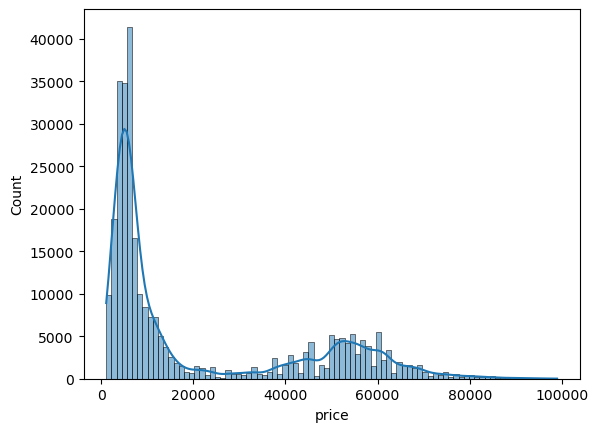

In [23]:
sns.histplot(df_clean['price'], kde=True);

In [24]:
# Convert stops columns into categorical column
df_clean['stops'] = df_clean['stops'].apply(lambda x: 0 if x=='zero' else 1 if x=='one' else 2)
df_clean

C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_14868\3898177371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['stops'] = df_clean['stops'].apply(lambda x: 0 if x=='zero' else 1 if x=='one' else 2)


,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5e889d77-39f4-4c55-87f1-e6809256972b,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,5f9c50db-8c77-4040-a45b-5661a7602f3d,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,eac77a21-8cb1-4750-9a65-db920d74b4de,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,d2f00ce0-2d54-4812-89b6-c9f3647ae4fb,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,e65cdf75-2cf5-427c-92a7-b312ec7a1bc6,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,cadb023d-0d0d-41bb-824b-3c5bdc45e357,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,8c328bd3-526b-4d84-9c75-79d7c4a837c0,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,d9e64727-33a7-4764-a0ab-1c41ebf34a93,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,e2700e01-e333-4c40-b992-7a60d012051f,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


In [25]:
# Separate numerical and caterogical feature

In [26]:
num_dtypes = ["int32", "int64", "float32", "float64"]

In [27]:
obj_dtypes = ["object"]

In [28]:
df_num = df_clean.select_dtypes(include = num_dtypes)

df_obj = df_clean.select_dtypes(include = obj_dtypes)
df_obj = df_obj.drop('id', axis=1)

num_cols = df_num.columns
obj_cols = df_obj.columns

In [29]:
num_cols

Index(['stops', 'duration', 'days_left', 'price'], dtype='object')

In [30]:
obj_cols

Index(['airline', 'source_city', 'departure_time', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')

<Axes: >

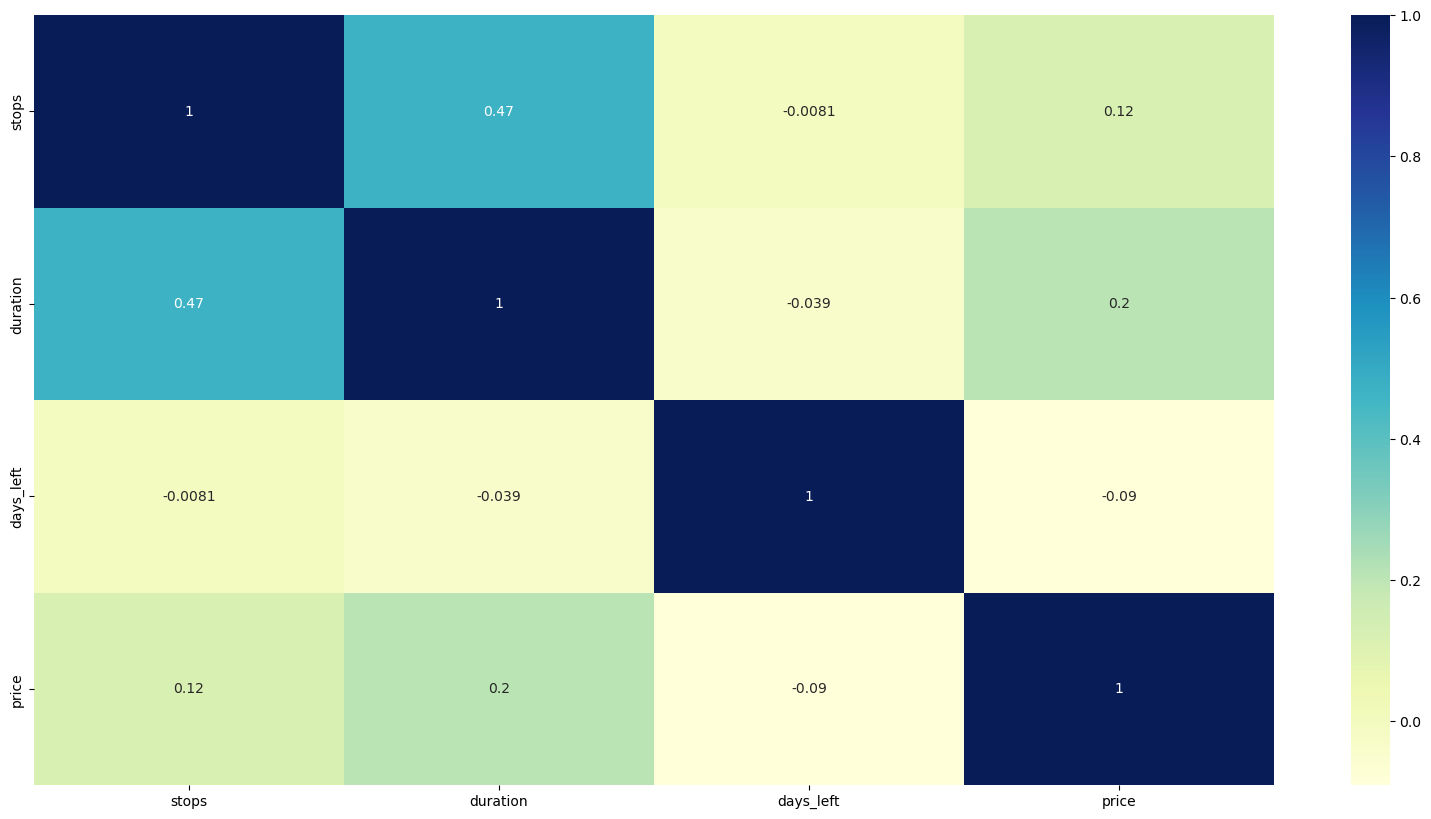

In [31]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df_clean[num_cols].corr(), cmap="YlGnBu", annot = True)

### One Hot Encoding

In [32]:
df_result = pd.get_dummies(df_clean, columns = obj_cols)
df_result = df_result.drop(['id'], axis=1)
df_result

,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,2.17,1,5953,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,0,2.33,1,5953,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,True
2,0,2.17,1,5956,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,0,2.25,1,5955,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
4,0,2.33,1,5955,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,69265,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
300149,1,10.42,49,77105,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
300150,1,13.83,49,79099,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
300151,1,10.00,49,81585,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False


## Model Building and Training

### Splitting Train Test

In [33]:
y = df_result["price"]
X = df_result.drop(columns = ["price"])

In [34]:
# Stratified random splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                            random_state=1)

Splitting the data into train and validation set such as to validate the results of our model on the validation set. Keeping 30% of the dataset as our validation set and the rest as our training set.

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210021, 35)
(90009, 35)
(210021,)
(90009,)


In [36]:
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib as jb
import warnings
warnings.filterwarnings('ignore')

In [37]:
def plot_predictions(y_train, predicted_y_train, y_test, predicted_y_test):
    plt.figure(figsize = (10,10))
    plt.subplot(1,2,1)
    plt.title('Training Set: Actual vs Predicted Labels')
    plt.xlabel('train lables')
    plt.ylabel('predicted labels')
    plt.scatter(y_train, predicted_y_train,color='red',marker='X')
    plt.plot(range(int(min(y_train)), int(max(y_train))),color='black')
    plt.subplot(1,2,2)
    plt.title('Test Set: Actual vs Predicted Labels')
    plt.xlabel('test lables')
    plt.ylabel('predicted labels')
    plt.scatter(y_test, predicted_y_test,color='blue',marker='o')
    plt.plot(range(int(min(y_test)), int(max(y_test))),color='black')
    plt.show()

In [38]:
# Train model and make it predict on test data 
def train_model(model):
  model.fit(X_train, y_train)
  
  # Find model score
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print(f'Train score {train_score}, Test score {test_score}')

  # Make model predict on train and test data
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Evaluate the model using MSE and R square
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  print(f'MSE train {mse_train}, MSE test {mse_test}')

  # Plot actual and prediced labels
  plot_predictions(y_train, y_train_pred, y_test, y_test_pred)

  return model, test_score

In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_jobs = -1),
    'Gradient Boosting': GradientBoostingRegressor()
}

model Linear Regression:
Train score 0.910870373503699, Test score 0.9119002094403383
MSE train 45772872.07612439, MSE test 44937406.131006055


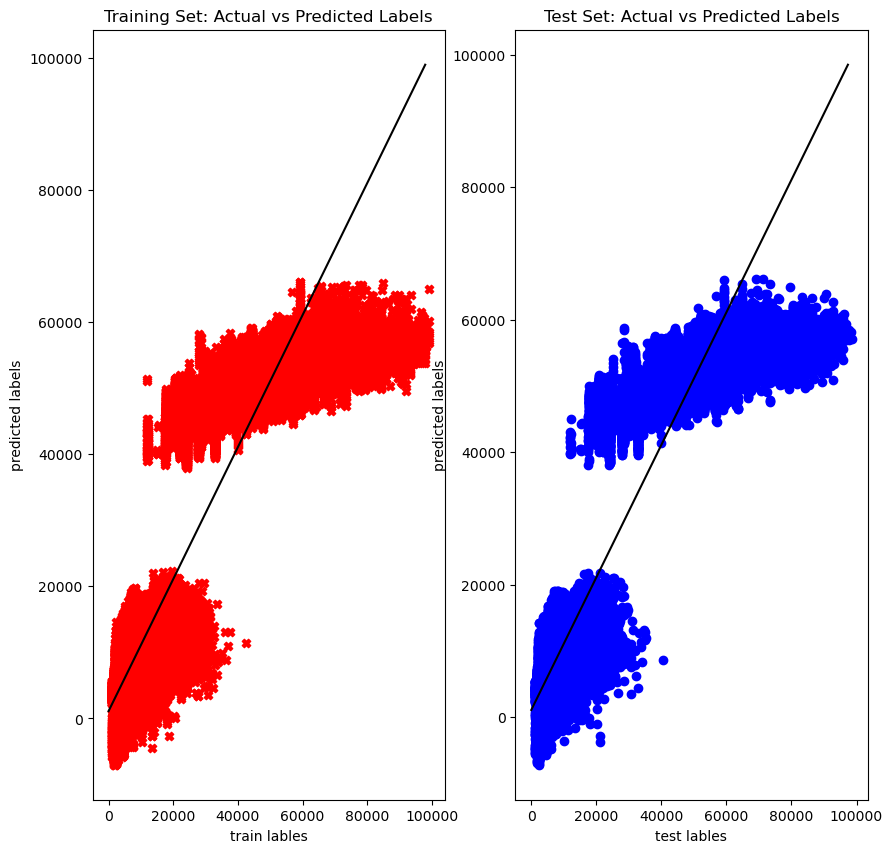

model Ridge:
Train score 0.9108703733382721, Test score 0.9119002576455555
MSE train 45772872.161079995, MSE test 44937381.54278159


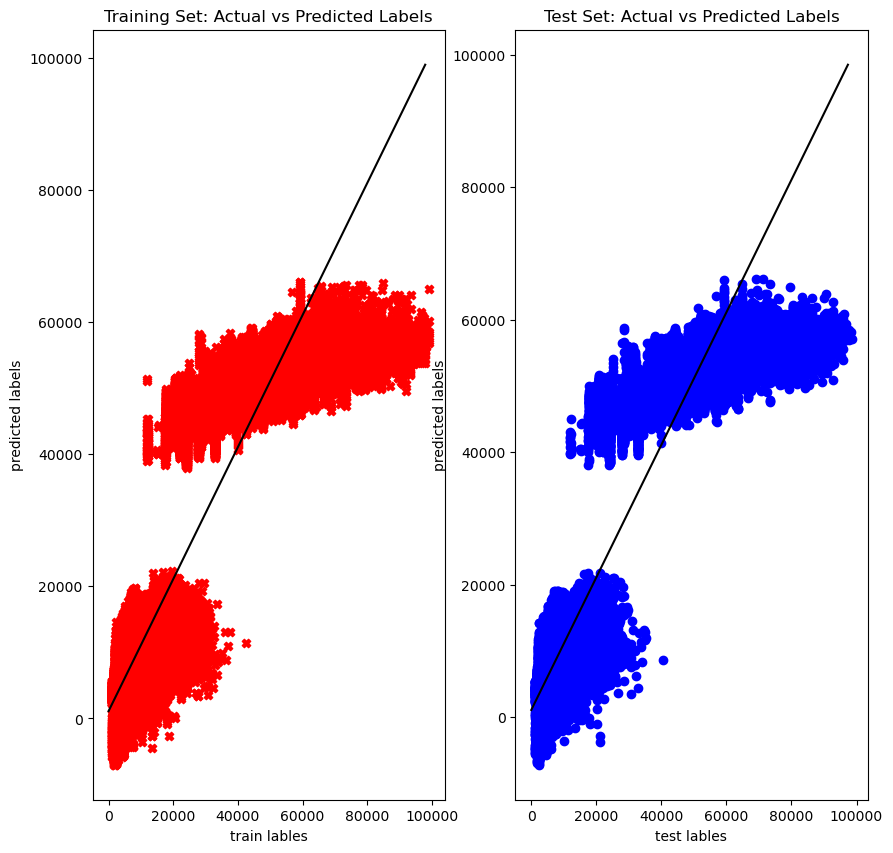

model Lasso:
Train score 0.9108694222440057, Test score 0.911902650133248
MSE train 45773360.59930084, MSE test 44936161.1971892


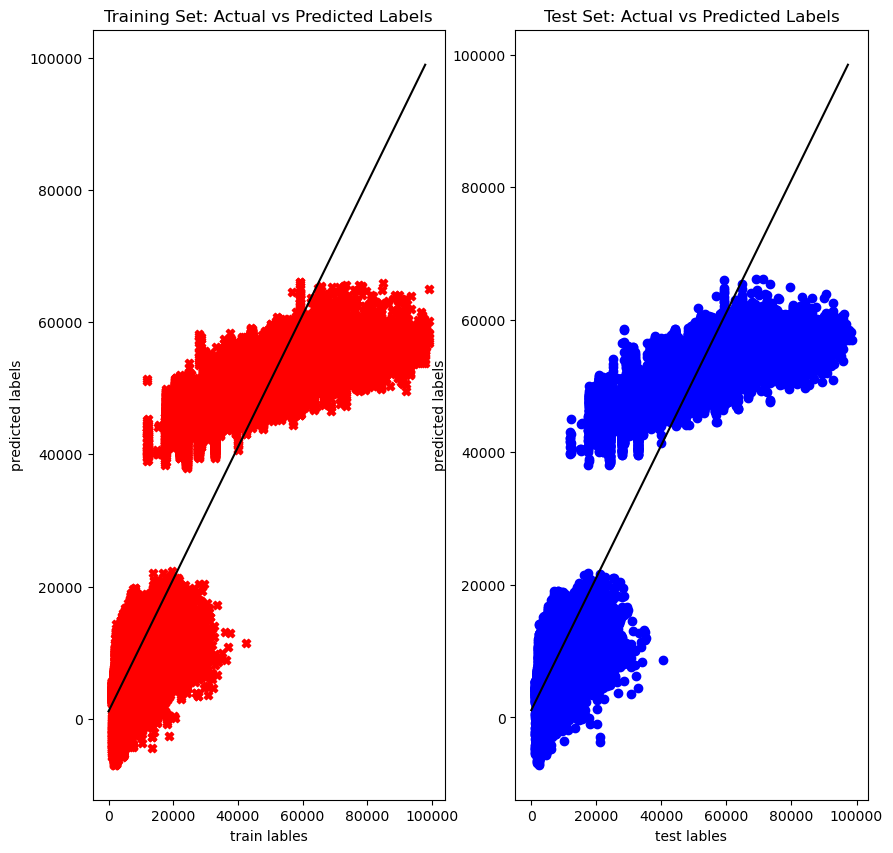

model ElasticNet:
Train score 0.6659342400454837, Test score 0.6675226410290851
MSE train 171560791.80973518, MSE test 169588032.10005787


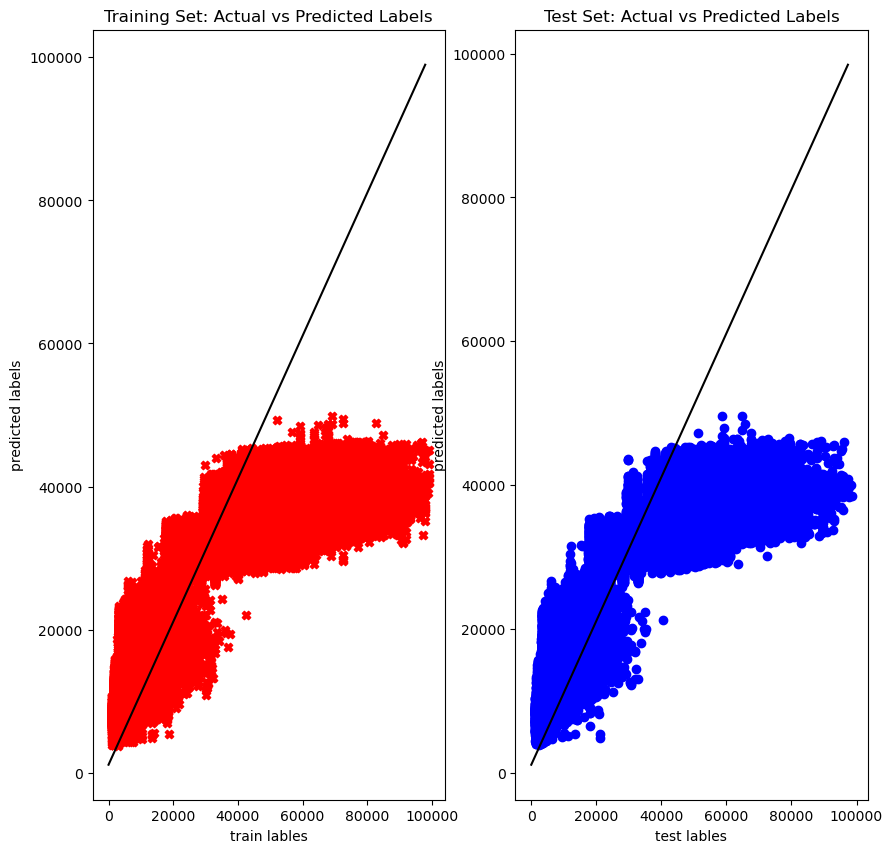

model Decision Tree:
Train score 0.9994100182094071, Test score 0.9770963554459707
MSE train 302987.4811510912, MSE test 11682551.918300146


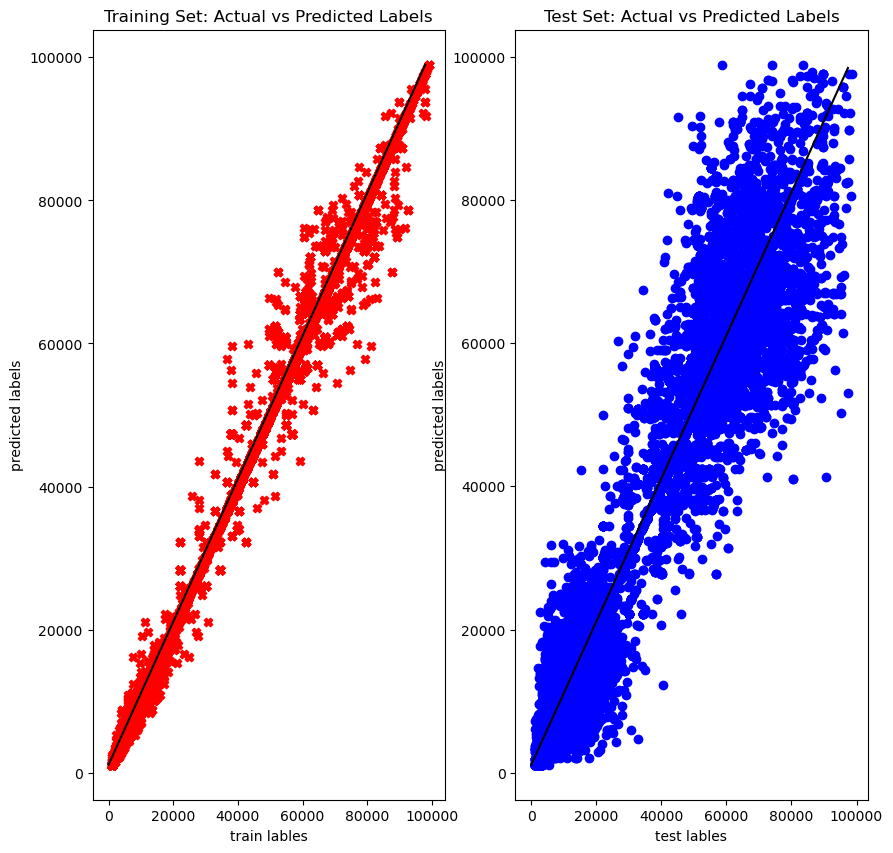

model Random Forest:
Train score 0.9976149795214756, Test score 0.9859627941603534
MSE train 1224836.6963252916, MSE test 7160012.7055188995


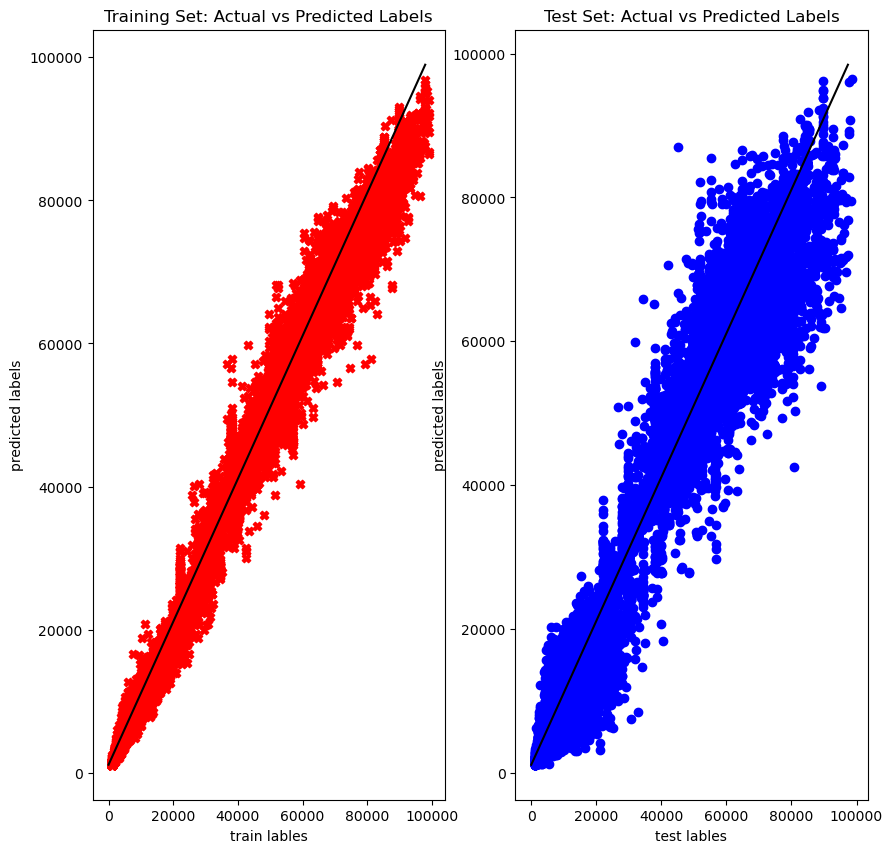

model Gradient Boosting:
Train score 0.9529695302119754, Test score 0.9534908109267226
MSE train 24152683.7025018, MSE test 23723124.708159782


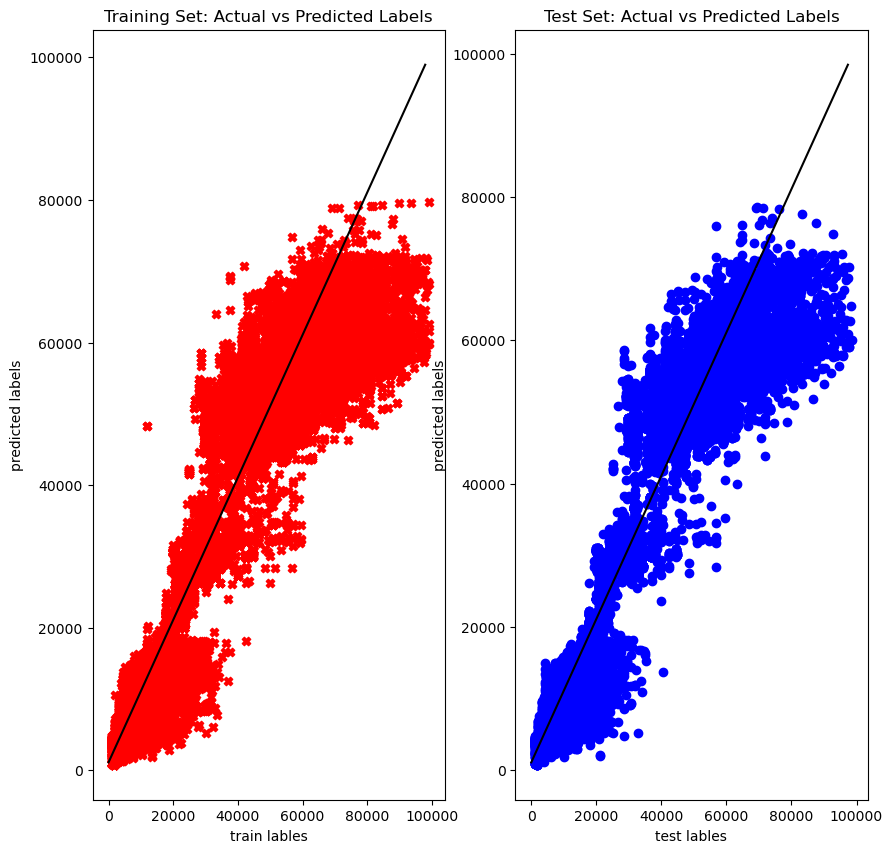

In [40]:
# Train each model and plot the results
all_trained_models = {}
best_model = None
best_score = 0
for model_name, model in models.items():  
  print(f'model {model_name}:')
  model, score = train_model(model)
  all_trained_models[model_name] = deepcopy(model)
  
  # Find the best model
  if score > best_score:
    best_model = deepcopy(model)
    best_score = score

In [41]:
# Until now, the random forest model is the best one, so lets check the feature importances
features = X_train.columns
importances = all_trained_models['Random Forest'].feature_importances_
important_features = pd.DataFrame({'feature':features, 'importance':importances})
important_features = important_features.sort_values(by='importance', ascending = False)
important_features[:10]

,feature,importance
34,class_Economy,0.458196
33,class_Business,0.423029
1,duration,0.057629
2,days_left,0.018063
4,airline_Air_India,0.005154
8,airline_Vistara,0.004674
11,source_city_Delhi,0.003706
29,destination_city_Delhi,0.003383
14,source_city_Mumbai,0.002216
32,destination_city_Mumbai,0.001952


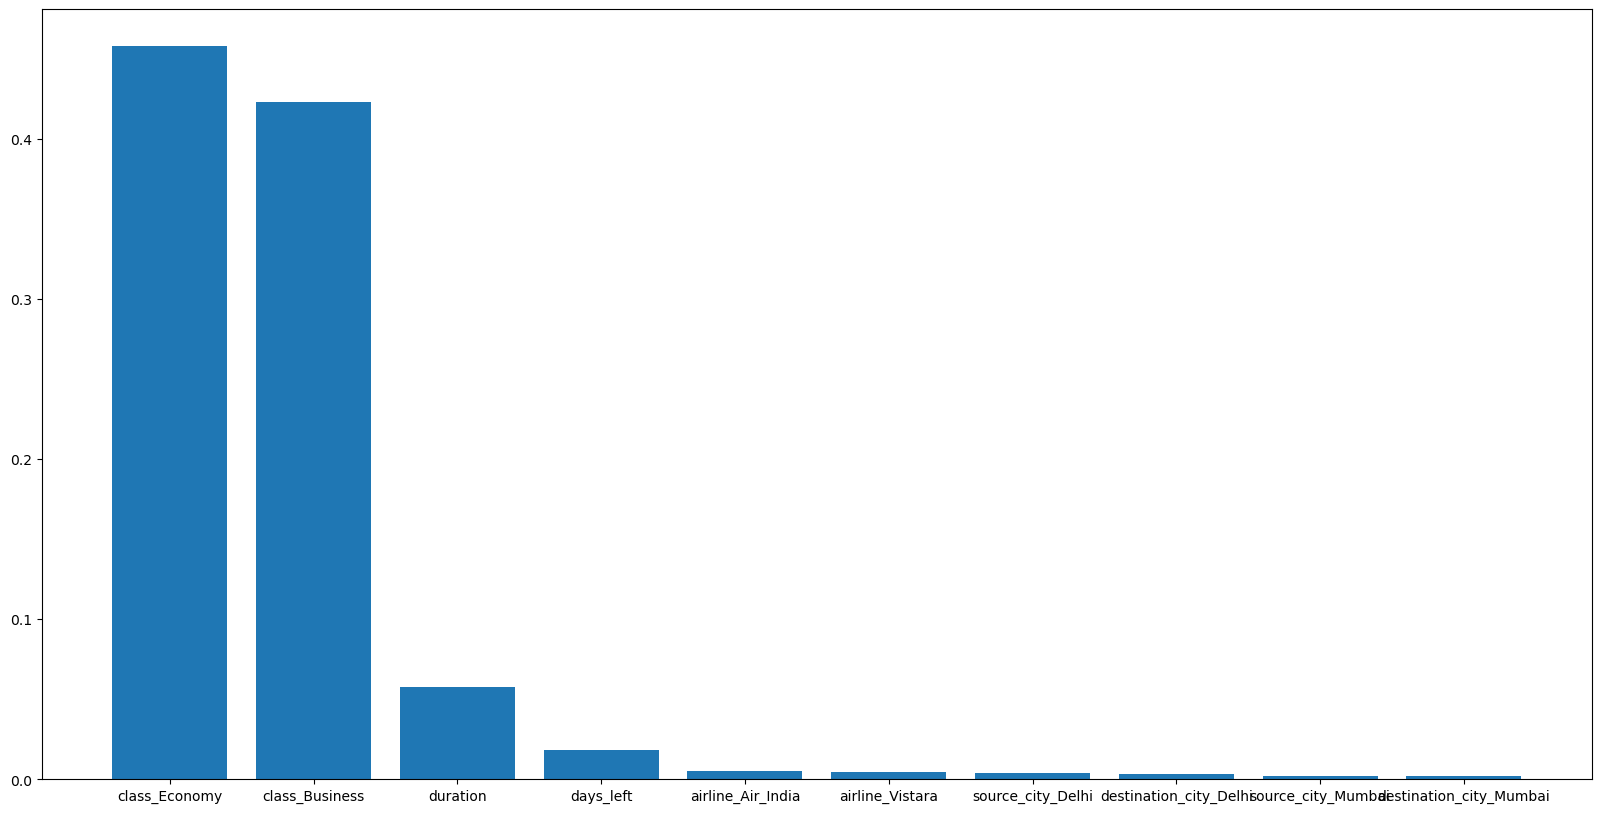

In [42]:
plt.figure(figsize = (20,10))
plt.bar([x[0] for x in important_features.values[:10]],
        [x[1] for x in important_features.values[:10]])
plt.show()

#### Hyperparameter Tuning

In [43]:
params = {
    'n_estimators':randint(100,300),
    'max_depth':[None, 10, 20, 30, 400],
    'min_samples_split':randint(2,11),
    'min_samples_leaf':randint(1,5),
    
}

# Create estimator
estimator = RandomForestRegressor(n_jobs = -1)

# Create GridSearch 
randomized_search = RandomizedSearchCV(estimator, 
                                       params, 
                                       cv = 3, 
                                       n_iter = 2,
                                      scoring = 'neg_mean_squared_error',
                                      verbose = 2, 
                                      random_state = 20,
                                      n_jobs = -1)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 400],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000217217BBB10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000217217BB890>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002175E478050>},
                   random_state=20, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
# Find best parameters after hyperparameter tuning process
best_params = randomized_search.best_params_
best_estimator = randomized_search.best_estimator_

In [45]:
# Show the best hyperparameters values
best_params

{'max_depth': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 175}

In [46]:
# Show model score on train and test data
train_score = best_estimator.score(X_train, y_train)
print(f'train score: {train_score}')
test_score = best_estimator.score(X_test, y_test)
print(f'test score: {test_score}')

train score: 0.9928993906881695
test score: 0.9868341519422053


In [47]:
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

In [48]:
# Evaluate the model using MSE and R square
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'MSE train {mse_train}, MSE test {mse_test}')
print(f'R Squared train {r2_train}, R Squared test {r2_test}')

MSE train 3646545.985542145, MSE test 6715555.819983205
R Squared train 0.9928993906881695, R Squared test 0.9868341519422053


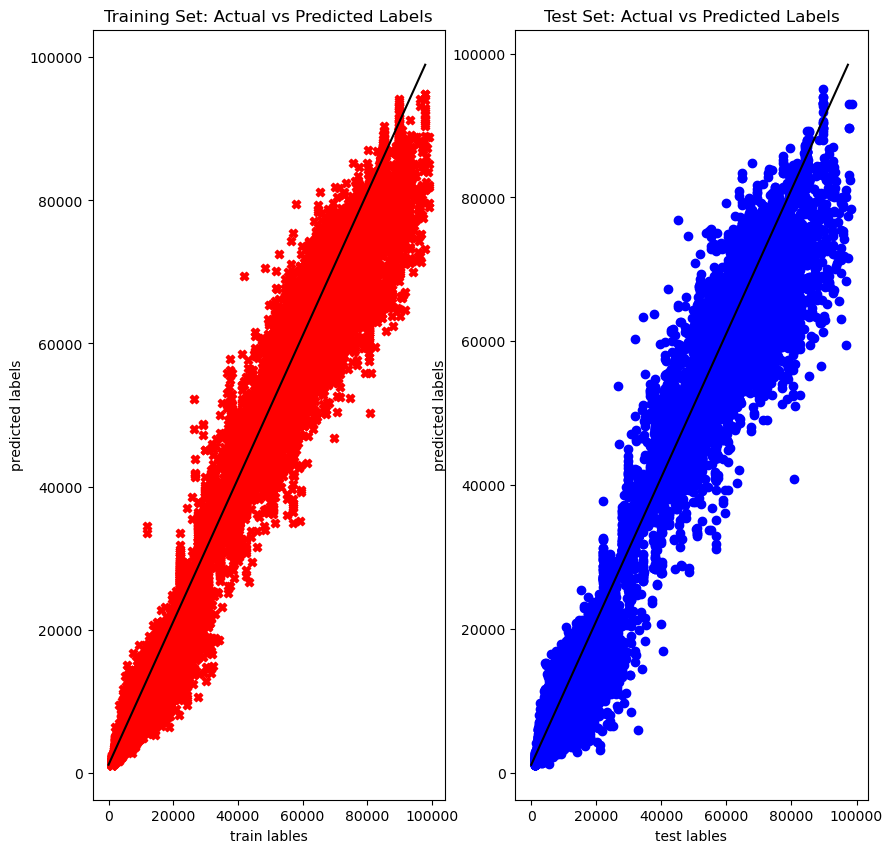

In [49]:
plot_predictions(y_train, y_train_pred, y_test, y_test_pred)

The best model so far is the **Random Forest model with hyperparameter tuning**.

Interpretation: A lower RMSE indicates a more robust model with fewer large prediction errors.

Interpretation: An $R^2$ of 0.98 means that 98% of the variation in flight prices can be explained by the features in the model.